In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
# each point is length, width, type (0,1)
data = [[298.33, 298.33, 299.02, 284.96, 294.84, 295.2, 289.46, 290.54, 279.44, 285.5],
        [263.24, 280.95, 280.74, 288.95, 301.66, 303.15, 305.01, 311.86, 319.27, 322.82],
        [320.1, 321.64, 321.9, 308.44, 305.5, 335.45, 338.69, 347.64, 356.41, 355.49],
        [352.45, 370.34, 379.57, 341.99, 348.17, 349.54, 300.84, 298.14, 290.17, 297.18],
        [306.65, 308.74, 297.43, 303.2, 313.58, 320.23, 323.85, 322.69, 310.1, 318.87],
        [316.71, 318.96, 322.47, 318.51, 308.9, 309.16, 310.86, 335.07, 342.95, 349.93],
        [344.5, 342, 333.01, 333.63, 347.51, 362.22, 352.55, 370.83, 358.17, 357.72],
        [344.78, 342.77, 332.1, 317.66, 316.09, 319.5, 291.13, 296.74, 291.82, 284.73]]

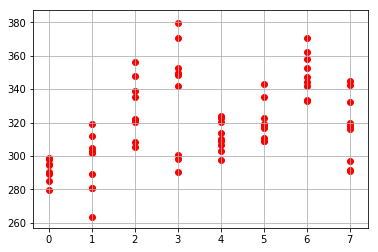

In [5]:
# network
#    o circle type
#   / \ w1, w2, b
#  o   o length, width

# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        for j in range(0, 9):
            c = 'r'
            plt.scatter(i, [data[i][j]], c=c)

#    plt.scatter([mystery_circle[0]], [mystery_circle[1]], c='gray')

vis_data()

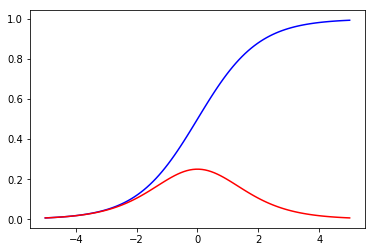

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))


X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p in red

In [7]:
T = np.linspace(-5, 5, 10)

In [8]:
T

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [9]:
Y = sigmoid(T)

In [10]:
Y

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

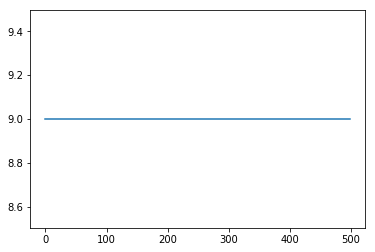

In [11]:
# training loop
def train():
    
    iterations = 10000
    learning_rate = 0.2
    costs = [] # keep costs during training, see if they go down

    w1 = np.random.randn()
    w2 = np.random.randn()
    w3 = np.random.randn()
    w4 = np.random.randn()
    w5 = np.random.randn()
    w6 = np.random.randn()
    w7 = np.random.randn()
    w8 = np.random.randn()
    w9 = np.random.randn()
    b = np.random.randn()

    for i in range(1, 50000):
        ri = np.random.randint(len(data))
        point = data[ri]

        z = (point[1] * w1 + point[2] * w2 +
        point[3] * w3 + point[4] * w4 + point[5] * w5 +
        point[6] * w6 + point[7] * w7 + point[8] * w8 + point[9] * w9 + b)

        pred = sigmoid(z)

        target = sigmoid(point[0])
        cost = np.square(pred - target)
    #   print(point, cost)
        if i % 100 == 0:
            c = 0
            for j in range(1,10):
                p_pred = sigmoid(point[1] * w1 + point[2] * w2 +
                point[3] * w3 + point[4] * w4 + point[5] * w5 +
                point[6] * w6 + point[7] * w7 + point[8] * w8 + point[9] * w9 + b)
                c += np.square(p_pred - sigmoid(point[0]))
                                   
            costs.append(c)

        dcost_pred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        dz_dw1 = point[1]
        dz_dw2 = point[2]
        dz_dw3 = point[3]
        dz_dw4 = point[4]
        dz_dw5 = point[5]
        dz_dw6 = point[6]
        dz_dw7 = point[7]
        dz_dw8 = point[8]
        dz_dw9 = point[9]
        dz_db = 1

        dcost_dz = dcost_pred * dpred_dz

        dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
        dcost_dw3 = dcost_pred * dpred_dz * dz_dw3
        dcost_dw4 = dcost_pred * dpred_dz * dz_dw4
        dcost_dw5 = dcost_pred * dpred_dz * dz_dw5
        dcost_dw6 = dcost_pred * dpred_dz * dz_dw6
        dcost_dw7 = dcost_pred * dpred_dz * dz_dw7
        dcost_dw8 = dcost_pred * dpred_dz * dz_dw8
        dcost_dw9 = dcost_pred * dpred_dz * dz_dw9
        dcost_db = dcost_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        w3 = w3 - learning_rate * dcost_dw3
        w4 = w4 - learning_rate * dcost_dw4
        w5 = w5 - learning_rate * dcost_dw5
        w6 = w6 - learning_rate * dcost_dw6
        w7 = w7 - learning_rate * dcost_dw7
        w8 = w8 - learning_rate * dcost_dw8
        w9 = w9 - learning_rate * dcost_dw9

        b = b - learning_rate * dcost_db    
    
    return costs, w1, w2, w3, w4, w5, w6, w7, w8, w9, b
costs, w1, w2, w3, w4, w5, w6, w7, w8, w9, b = train()

fig = plt.plot(costs)

In [12]:
# scatter data

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = (point[1] * w1 + point[2] * w2 +
                point[3] * w3 + point[4] * w4 + point[5] * w5 +
                point[6] * w6 + point[7] * w7 + point[8] * w8 + point[9] * w9 + b)
    print(pred)

[298.33, 298.33, 299.02, 284.96, 294.84, 295.2, 289.46, 290.54, 279.44, 285.5]
-153.71733187191526
[263.24, 280.95, 280.74, 288.95, 301.66, 303.15, 305.01, 311.86, 319.27, 322.82]
-213.42881660333498
[320.1, 321.64, 321.9, 308.44, 305.5, 335.45, 338.69, 347.64, 356.41, 355.49]
-274.8140742498817
[352.45, 370.34, 379.57, 341.99, 348.17, 349.54, 300.84, 298.14, 290.17, 297.18]
-104.45532269298201
[306.65, 308.74, 297.43, 303.2, 313.58, 320.23, 323.85, 322.69, 310.1, 318.87]
-189.4598493220663
[316.71, 318.96, 322.47, 318.51, 308.9, 309.16, 310.86, 335.07, 342.95, 349.93]
-264.27312682437383
[344.5, 342, 333.01, 333.63, 347.51, 362.22, 352.55, 370.83, 358.17, 357.72]
-231.3908210445093
[344.78, 342.77, 332.1, 317.66, 316.09, 319.5, 291.13, 296.74, 291.82, 284.73]
-143.57968446638375


In [13]:
z = mystery_circle[0] * w1 + mystery_circle[1] * w2 + b
pred = sigmoid(z)
pred

NameError: name 'mystery_flower' is not defined

In [14]:
def which_circle(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print("circle is blue")
    else:
        print("circle is red")

In [15]:
which_circle(4, 2)

Flower is red


In [16]:
test = data[1]
print(test[2])

280.74
